# Introduction to Neural Networks using Keras (TensorFlow)

This tutorial is adapted from Chapter 10 of Geron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.

"Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks. Its documentation (or specification) is available at https://keras.io/. The reference implementation, also called Keras, was developed by François Chollet as part of a research project14 and was released as an open source project in March 2015. It quickly gained popularity, owing to its ease of use, flexibility, and beautiful design." (Geron, 2019).

TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. We will use TensorFlow's Keras API in this tutorial.

## Implementing (Multi-layer Perceptrons) MLPs with Keras

### Building an Image Classifier Using the Sequential API

"In this tutorial we will use the Fashion MNIST dataset, which is a drop-in replacement of MNIST (digit dataset from a previous tutorial). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST." Geron, 2019.

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [1]:
# Import TensorFlow (so that we can use Keras)
import tensorflow as tf

# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Select 55,000 datapoints for training and 5,000 datapoints for tvalidation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [2]:
# Check size of the training data and validation data
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


As we've done with the MNIST dataset (handwritten digits), to preprocess the images for the neural network we divide the grayscale values in each pixed by 255 its maximum value. This is a common way of scaling image data.

In [3]:
# Preprocess training and validation data
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

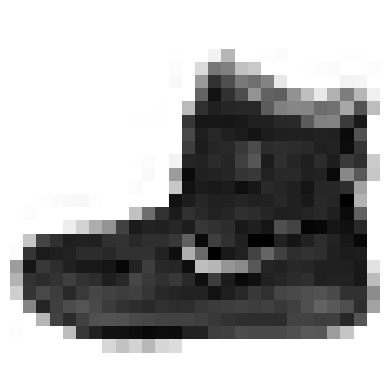

In [4]:
# Plot one example raw image
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
# Define names of the classes in the dataset (Fashion items)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

It is always a good idea when possible to explore the dataset before using it to train the machine learning/neural network model. In this case we will visualise a few images (raw training data) with their corresponding targets/labels (what we are trying to predict once the model has trained).

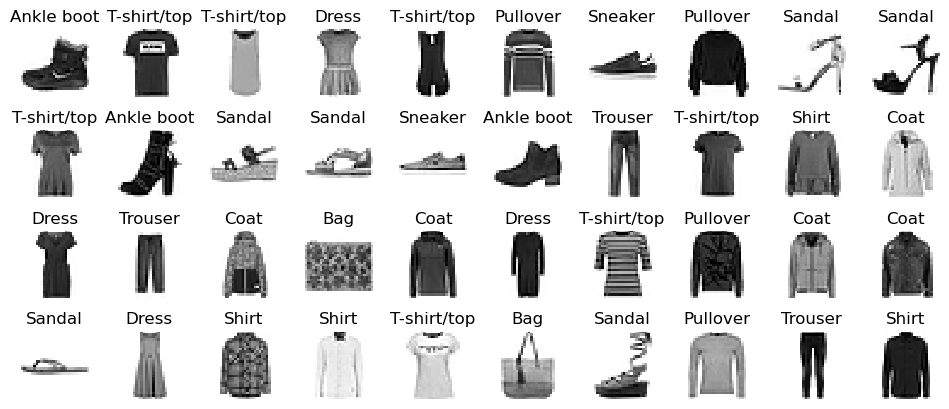

In [6]:
# Plot several data points with correspondings labels
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now we are going to create the classification network (MLP classification model) using Keras and the sequential API (there are others ways to define the model in Keras and Tensorflow, see their documentation for more details). This API is simple to use and flexible enough for what we need in this tutorial.

For our neural network, we need an input layer with input shape the size of the input images (28x28 pixels), we are going to use two hidden layers (called Dense layers), one with 300 and one with 100 neurons, and an output layer with 10 neurons (because we have 10 different classes, fashion items to classify).

In [7]:
# Extra code to clear tensorflow session and set random seed (so we can reproduce the same results)
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# Define neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

The following paragraphs from Geron's book explain the above lines of code used to define the neural network model:

- The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.
- Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it
computes X.reshape(-1, 28*28). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer,  etting input_shape=[28,28].
- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
- Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

One way to check the model (number of layers, number of parameters, etc.) that has just been created is to use the summary() function:

In [8]:
# Show summary of neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


"Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data." Geron, 2019.

One can also display the layers of the model as follows:

In [9]:
# Show layers of the neural network
model.layers

In [10]:
# Get name of a specific layer, in this case layer 2
hidden1 = model.layers[1]
hidden1.name

'dense'

On other way of obtaining a layer from the model is to use get_layer():

In [11]:
# Get layer
model.get_layer('dense_1') is hidden1

False

A very import method is the get_weights() method to obtain the parameters (weights and biases) of each layer:

In [12]:
weights, biases = hidden1.get_weights()

Check if the weights have the correct shape (in this case 28x28=784 by 300, which is the number of neurons for this layer).

In [13]:
# Check size of weights for this layer
weights.shape

(784, 300)

The weights are automatically initialiseed using random values (this is important because if the weights are not randomly initialised the neural network will not train correctly).

In [14]:
# Check that weights have been randomly initialised
weights

array([[ 0.04351559,  0.07095979,  0.01915665, ...,  0.05252522,
         0.03148813, -0.01948665],
       [-0.03090431, -0.00831004,  0.00471206, ..., -0.01067413,
        -0.07099175, -0.04407225],
       [ 0.00846849, -0.04716832,  0.00320216, ...,  0.04226677,
         0.0678619 , -0.07328322],
       ...,
       [-0.0288461 , -0.06354287, -0.000351  , ...,  0.03664969,
         0.05544788, -0.06372856],
       [ 0.01958121, -0.069978  ,  0.04070774, ...,  0.05942634,
        -0.05262826,  0.05479036],
       [-0.06635129,  0.05478896, -0.01779502, ...,  0.0654861 ,
         0.00666253,  0.06741191]], dtype=float32)

In [15]:
# Biases are initialised to zero
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

We have one bias value per neuron in a given hidden layer, so for this layer the bias vector should be 300x1 as can be seen below:

In [16]:
# Check size of bias vector
biases.shape

(300,)

### Compiling the model

"After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation". In this case we will use the most common loss and metric for classification tasks. SGD is the stochastic gradient descent algorithm used to train the model.

For the full list of losses, optimisers and metrics see the following links, respectively see https://keras.io/losses, https://keras.io/optimizers, and https://keras.io/metrics.

In [17]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

"We use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss." Geron, 2019.

### Training and evaluating the model

The model is ready to be trained. To train we need only to call fit().

"We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set)." Geron, 2019.

In [18]:
# Save the training information for each iteration into the variable history
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7418 - accuracy: 0.7594 - val_loss: 0.5118 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4881 - accuracy: 0.8307 - val_loss: 0.4681 - val_accuracy: 0.8306
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8461 - val_loss: 0.4251 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4167 - accuracy: 0.8544 - val_loss: 0.3964 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3960 - accuracy: 0.8625 - val_loss: 0.3968 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3802 - accuracy: 0.8664 - val_loss: 0.3993 - val_accuracy: 0.8616
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3678 - accuracy: 0.8701 - val_loss: 0.3746 - val_accurac

"The neural network is trained.16 At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. You can see that the training loss went down, which is a good sign, and the validation accuracy reached 89.26% after 30 epochs. That’s not too far from the training accuracy, so there does not seem to be much overfitting going on." Geron, 2019.

Important when the classes are highly imbalanced: "If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights, set the sample_weight argument (if both class_weight and sample_weight are provided, Keras multiplies them)." Geron, 2019.

In [19]:
# Show history metadata
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

"The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its plot() method, you get the learning curves." Geron, 2019

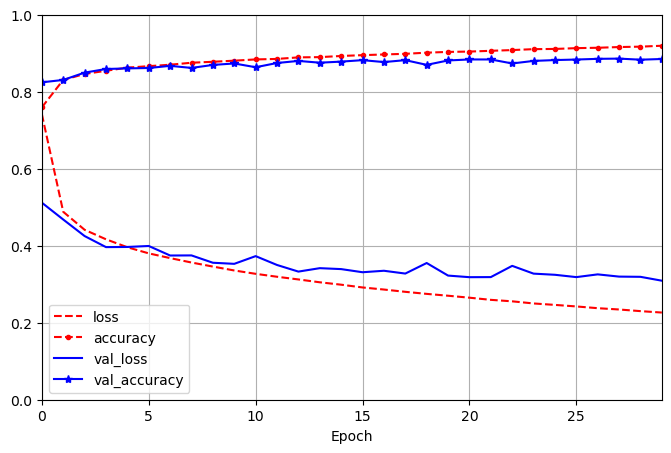

In [20]:
# Plot learning curves from history
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

"You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training." Geron, 2019.

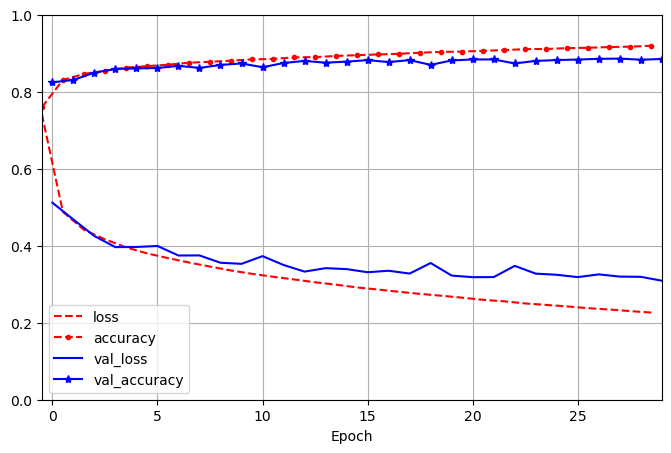

In [21]:
# Shift the training curve by -1/2 epoch
import numpy as np

plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

"The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the fit() method again, since Keras just continues training where it left off (you should be able to reach close to 89.4% validation accuracy)." Geron, 2019.

"If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32)." Geron, 2019.

### Evaluate model on test data

Once we are satisfied with the model’s validation accuracy, we should evaluate it on the test set to estimate the generalisation error before we deploy the model to production. This can be done using evaluate():

Check the documentation to see other optional arguments that can be passed to evaluate(): https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

In [22]:
# Evaluate model on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8866


[0.31882643699645996, 0.8866000175476074]

"Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic." Geron, 2019.

### Using the model to make predictions

We can now use the model to make predictions. Since we don't have any additional data we just use some of the test data to check how the model makes predictions.

In [23]:
# Select some test examples and make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 72ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

The output of predict is the probability for each fashion item (class) for each test example (in this case 3 images). For the first image the model predicts that the last class has 0.98 probability of being the correct class in the image.

In [24]:
# Calculate the class number from the output of predict
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [25]:
# Get the actual class names predicted
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

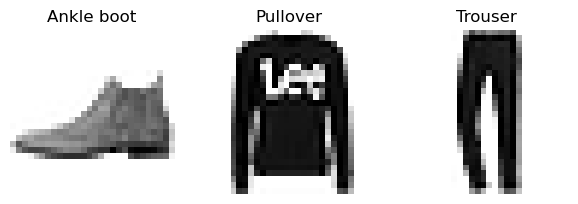

In [26]:
# Plot the predictions for the 3 test examples selected above
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

"Let’s switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn’s fetch_california_housing() function to load the data. This dataset is simpler than the one we used in Chapter 2, since it contains only numerical features (there is no ocean_proximity feature), and there is no missing value. After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features:" Geron, 2019



In [27]:
# Load the California housing dataset (similar to the dataset used in previpous tutorials)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# Split into train, validation and test datasets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Preprocess data (standardise numerical data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

"Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting." Geron, 2019.

In [29]:
# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss="mean_squared_error", optimizer="sgd")

# Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate on test data
mse_test = model.evaluate(X_test, y_test)

# Make predictions
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8229 - val_loss: 23.2019
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7332 - val_loss: 2.6382
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4445 - val_loss: 0.3966
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4035 - val_loss: 0.3831
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3942 - val_loss: 0.3785
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3840 - val_loss: 0.3938
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3854 - val_loss: 0.3769
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3727 - val_loss: 0.3836
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3674 - val_loss: 0.3857
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3644 - val_loss: 0.385

In [31]:
mse_test

0.34730368852615356

<span style="color:orange">TO DO: Plot learning curves (training/validation loss and error) for regression MLP.</span>

<span style="color:orange">TO DO: Try other hyper-parameters for the models, such as different learning rates, different minibatch sizes, and optimisers.</span>

## Saving and Restoring a Model

Saving and loading a model using Keras is extremely easy.

"Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have)." Geron, 2019.

In [32]:
# Save Keras model
model.save("my_keras_model.h5")

c:\Users\md82\AppData\Local\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
# Load Keras model
model = tf.keras.models.load_model("my_keras_model.h5")